I start by reading in the slopes that I obtained from linear regression and stored in a pickled file:

In [1]:
import pandas as pd
df = pd.read_pickle('EU_industry_production_slopes.pkl')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, AT to UK
Data columns (total 3 columns):
intercept    34 non-null float64
slope        34 non-null float64
slope_alt    34 non-null float64
dtypes: float64(3)
memory usage: 1.1+ KB
              intercept     slope  slope_alt
country_code                                
AT             0.979511  0.016976   0.015406
BE             0.935067  0.022740   0.020389
BG             1.001175  0.023327   0.028590
CY             0.906360 -0.027304  -0.018144
CZ             0.984347  0.030179   0.031784


Let's see how the growth dynamics of the different countries' manufacturing production index, as measured by the slope parameter of the linear regression, compare.

Since the data is one-dimensional, with float values for the slope and discrete categorical values for the country code, a bar chart is a good plot type for visualization.

With pandas dataframes, a bar chart is simply created by loading matplotlib, calling the "plot()" method with the "kind='bar'" keyword argument, followed by the usual "show()" command to draw the figure:

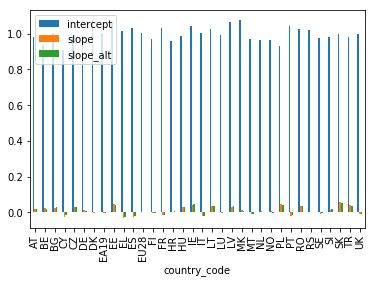

In [21]:
import matplotlib.pyplot as plt

df.plot(kind='bar')
plt.show()

As we can see, by default all numerical columns are plot simultaneously, sharing one y axis. The intercept values dwarf the slope values though, so I best keep them from the plot by only selecting the slope columns:

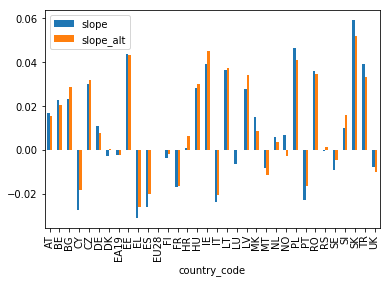

In [22]:
df[['slope','slope_alt']].plot(kind='bar')
plt.show()

Okay, now I can see something!

However, the y axis is not labeled yet. I can fix this with the "ylabel()" method.

Also, I multiply the slope values by 100 (using the pandas "mul()" method) to get the percentage change of the production index per year:

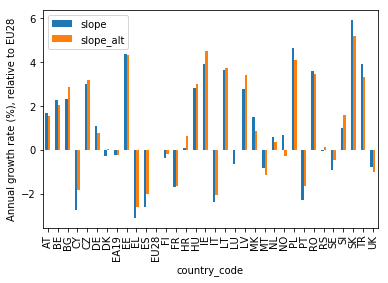

In [33]:
df[['slope','slope_alt']].mul(100).plot(kind='bar')
plt.ylabel('Annual growth rate (%), relative to EU28')
plt.show()

Better!

Note, though, that the slope values keep changing wildly, giving the plot a somewhat chaotic look. This is because the country codes on the x axis are in alphabetical order. The plot would look much cleaner if the country codes were ordered by the slope values instead.

This I can do by chaining the "sort_values()" method before plotting. I tell pandas to sort by the "slope" column using the "by" keyword and to do so in descending order by setting "ascending=False". In addition, I set a title for the plot:

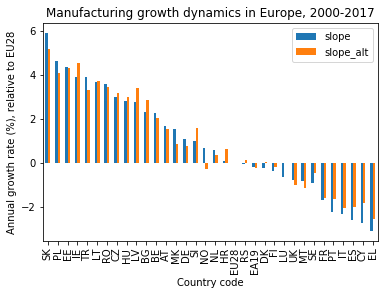

In [38]:
ax = df[['slope','slope_alt']].mul(100).sort_values(by=['slope'], ascending=False).plot(kind='bar')
plt.xlabel('Country code')
plt.ylabel('Annual growth rate (%), relative to EU28')
plt.title('Manufacturing growth dynamics in Europe, 2000-2017')
plt.show()

In this shape, the plot is clean enough to allow for an easy visual analysis of the data. This will be the topic of the subsequent project. 